### Project:
* #### Building a Classification Predictive Model of State Wise Dresses Image according to pixels using CNN + ANN neural network

### Training Process

* #### Handling Images Dataset
    * Collect Images
    * Take the Images in Class folders (Binary/Multi-Class)
    * Split the data into Train & Test folders having Same number of classes along with images
  
* #### Preparing the images for the CNN
    * Reading Train, Test folder images
    * Rescale , Resize of each image from both the folders

* #### Build CNN+ANN Architecture
    * CNN
        * Convolution Layer
        * Pooling Layer
        * Flatten
    * Fully Connected Layer (Flatten Out + ANN)

### 0. Images Dataset

* Images Data Set Collected from open sources
* We got the images in each class folder , which is required format of CNN
    
                    Images folder
                        - class folder
                            - images

* **Reading Images along with folders**

In [1]:
import os

In [2]:
# Class Folders

os.listdir("/kaggle/input/dataset1/TraditionalDressesStateWise")

['SikkimDressingStyle',
 'AndhraPradeshDressingStyle',
 'JammuKashmirDressingStyle',
 'MaharashtraDressingStyle',
 'KeralaDressingStyle']

* Here folder names are the output class names

In [3]:
# Images in a Class Folder

os.listdir("/kaggle/input/dataset1/TraditionalDressesStateWise/AndhraPradeshDressingStyle")[0:10]

['Kurta and Pajama worn by men in Andhra Pradesh_Image_68.jpg',
 'Pochampally Ikat Sarees from Andhra Pradesh_Image_17.jpg',
 'Shirt and trousers worn by men in Andhra Pradesh_Image_21.jpeg',
 'Andhra Pradesh Dhoti and Kurta for men_Image_38.jpg',
 'Venkatagiri Sarees of Andhra Pradesh_Image_1.jpg',
 'Langa Voni half saree worn by young girls_Image_8.jpg',
 'Pancha Dhoti traditional attire from Andhra Pradesh_Image_13.jpg',
 'Pancha Dhoti traditional attire from Andhra Pradesh_Image_1.jpeg',
 'Andhra Pradesh Lungi for men_Image_41.jpg',
 'Andhra Pradesh Dhoti and Kurta for men_Image_9.jpg']

* Inside folder images are input to cnn architecture

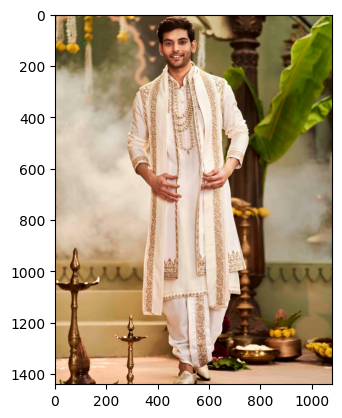

In [4]:
# Display of one image in folder

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.imshow(mpimg.imread("/kaggle/input/dataset1/TraditionalDressesStateWise/AndhraPradeshDressingStyle/Andhra Pradesh Dhoti and Kurta for men_Image_1.jpg"))

* **Train-Test Split of Images**

import numpy as np
import shutil

def train_test_split():

    print("########### Train Test Val Script started ###########")

    root_dir = '/kaggle/input/state-wise-dressing-style/TraditionalDressesStateWise' # Images Data Presented Folder name (Source Folder)

    # Classnames

    classes_dir = os.listdir(root_dir)

    processed_dir = 'CNN Data' # Destination Folder

    test_ratio = 0.20

    for cls in classes_dir:

        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name: " + cls + " $$$$$$$")

        # Connecting to Class folder
        src = root_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src) # Identifying Files in Class folder

        # Train-Test Split
        np.random.shuffle(allFileNames)
        train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                   [int(len(allFileNames) * (1 - (test_ratio)))])

        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))
        print()

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(processed_dir + '/train//' + cls)
        os.makedirs(processed_dir + '/test//' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, processed_dir + '/train//' + cls)

        for name in test_FileNames:
            shutil.copy(name, processed_dir + '/test//' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

### 1. Prepping Images for CNN

* **Loading Train and Test folder Images along with class names from CNN Data Folder**

**Image Data Generator**

* In keras we have **Image data generator** method to read the data from folders and give it to cnn architecture
* Image Data generator not only used for the above step, it can also used for data augmentation

* **Image Data Augmentation**
    - Image data augmentation is the process of generating new transformed versions of images from the given image dataset to increase its diversity
    * This can be done by using transformations such as random rotations, shear transforms, shifts zooms and flips, on available image data.

    * It will be helpful when the training data is very low

    * Keras ImageDataGenerator class allows the users to perform image augmentation while training the model

In [5]:
# Module

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-08 10:39:17.254163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746700757.744620      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746700757.885268      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


* **Defining of Data Gen for Train and Test**


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# different param will be taken for transformation of images while training model

test_datagen = ImageDataGenerator(rescale=1./255)
# no transformations for test

* **Loading Train Data**

In [7]:
x_train = train_datagen.flow_from_directory("/kaggle/input/cnndata/CNN Data/train",target_size=(256,256),color_mode='rgb',class_mode="categorical",batch_size=32)

# class mode will be 'catogorical' for multiclass classification
# target_size is the image size given to cnn as input 
# target_size will send all images under one size for the cnn, to extract same number of features

Found 3949 images belonging to 5 classes.


* **Loading Test Data**

In [8]:
x_test = test_datagen.flow_from_directory("/kaggle/input/cnndata/CNN Data/test",target_size=(256,256),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 808 images belonging to 5 classes.


* **Visualization of data generator Images**

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
for i,image in enumerate(x_train, 1):
    if(i==12):
        break
    plt.subplot(4,3,i) #
    plt.imshow(image[0][15])
    classes = {v: k for k, v in x_train.class_indices.items()}
    name = classes[np.argmax(image[1][15])]
    plt.title("Batch: {} & Image Class: {}".format(i, name))

### 2. Model

* Building CNN (to Extract Image Features) +ANN (Classification) Architecture
    * Below are the layers for each Network
    * CNN
        * Convolution Layer
        * Pooling Layer
        * Flatten Layer
    * ANN @ Fully Connected Layer

**CNN**




In [9]:
# Modules

from keras import Sequential

from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense

* **Model Intialization**

In [10]:
cnn = Sequential(name='StatewiseDressesImageClassification')

* **Convolution Layer**

    * Filtering image with different filters

        params

            filters, kernel_size, stride size, input shape
            activation

        Note:

        * Padding is another param where we can send the original image size through the entire convolution , it will add an extra pixel to the input image

        * relu is used to deal with non-linearity in the convolution

In [11]:
cnn.add(Conv2D(input_shape=(256,256,3), filters = 32, kernel_size=(3,3), strides=(2,2), name='Conv1'))
cnn.add(Activation('relu'))
cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746700818.402599      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746700818.403522      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "StatewiseDressesImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 127, 127, 32)        │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

* **Pooling**

    * Getting max pixel values from convolution feature maps

        params:

            pool_size, strides

In [12]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool1'))
cnn.summary()

Model: "StatewiseDressesImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 126, 126, 32)        │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

* **Dropout Layer (optional)**

    * We can use dropout function for conv+pool layer to drop some neurons going over fitting
    * Dropout is used when we hava e complex network
    * Droput will take out the least effective neurons

cnn.add(Dropout(0.25))
cnn.summary()

* **Adding Extra Convolution+Pooling Layer (Optional) - To control the Flatten Output**

In [13]:
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv2'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool2'))

In [14]:
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv3'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool3'))

In [15]:
cnn.summary()

Model: "StatewiseDressesImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 63, 63, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 31, 31, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 30, 30, 16)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,000 (15.62 KB)

 Trainable params: 4,000 (15.62 KB)

 Non-trainable params: 0 (0.00 B)

* **Flatten Layer**

In [16]:
cnn.add(Flatten(name='Flatten'))

In [17]:
cnn.summary()

Model: "StatewiseDressesImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 63, 63, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 31, 31, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 14400)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,000 (15.62 KB)

 Trainable params: 4,000 (15.62 KB)

 Non-trainable params: 0 (0.00 B)

* **Model Visualization**

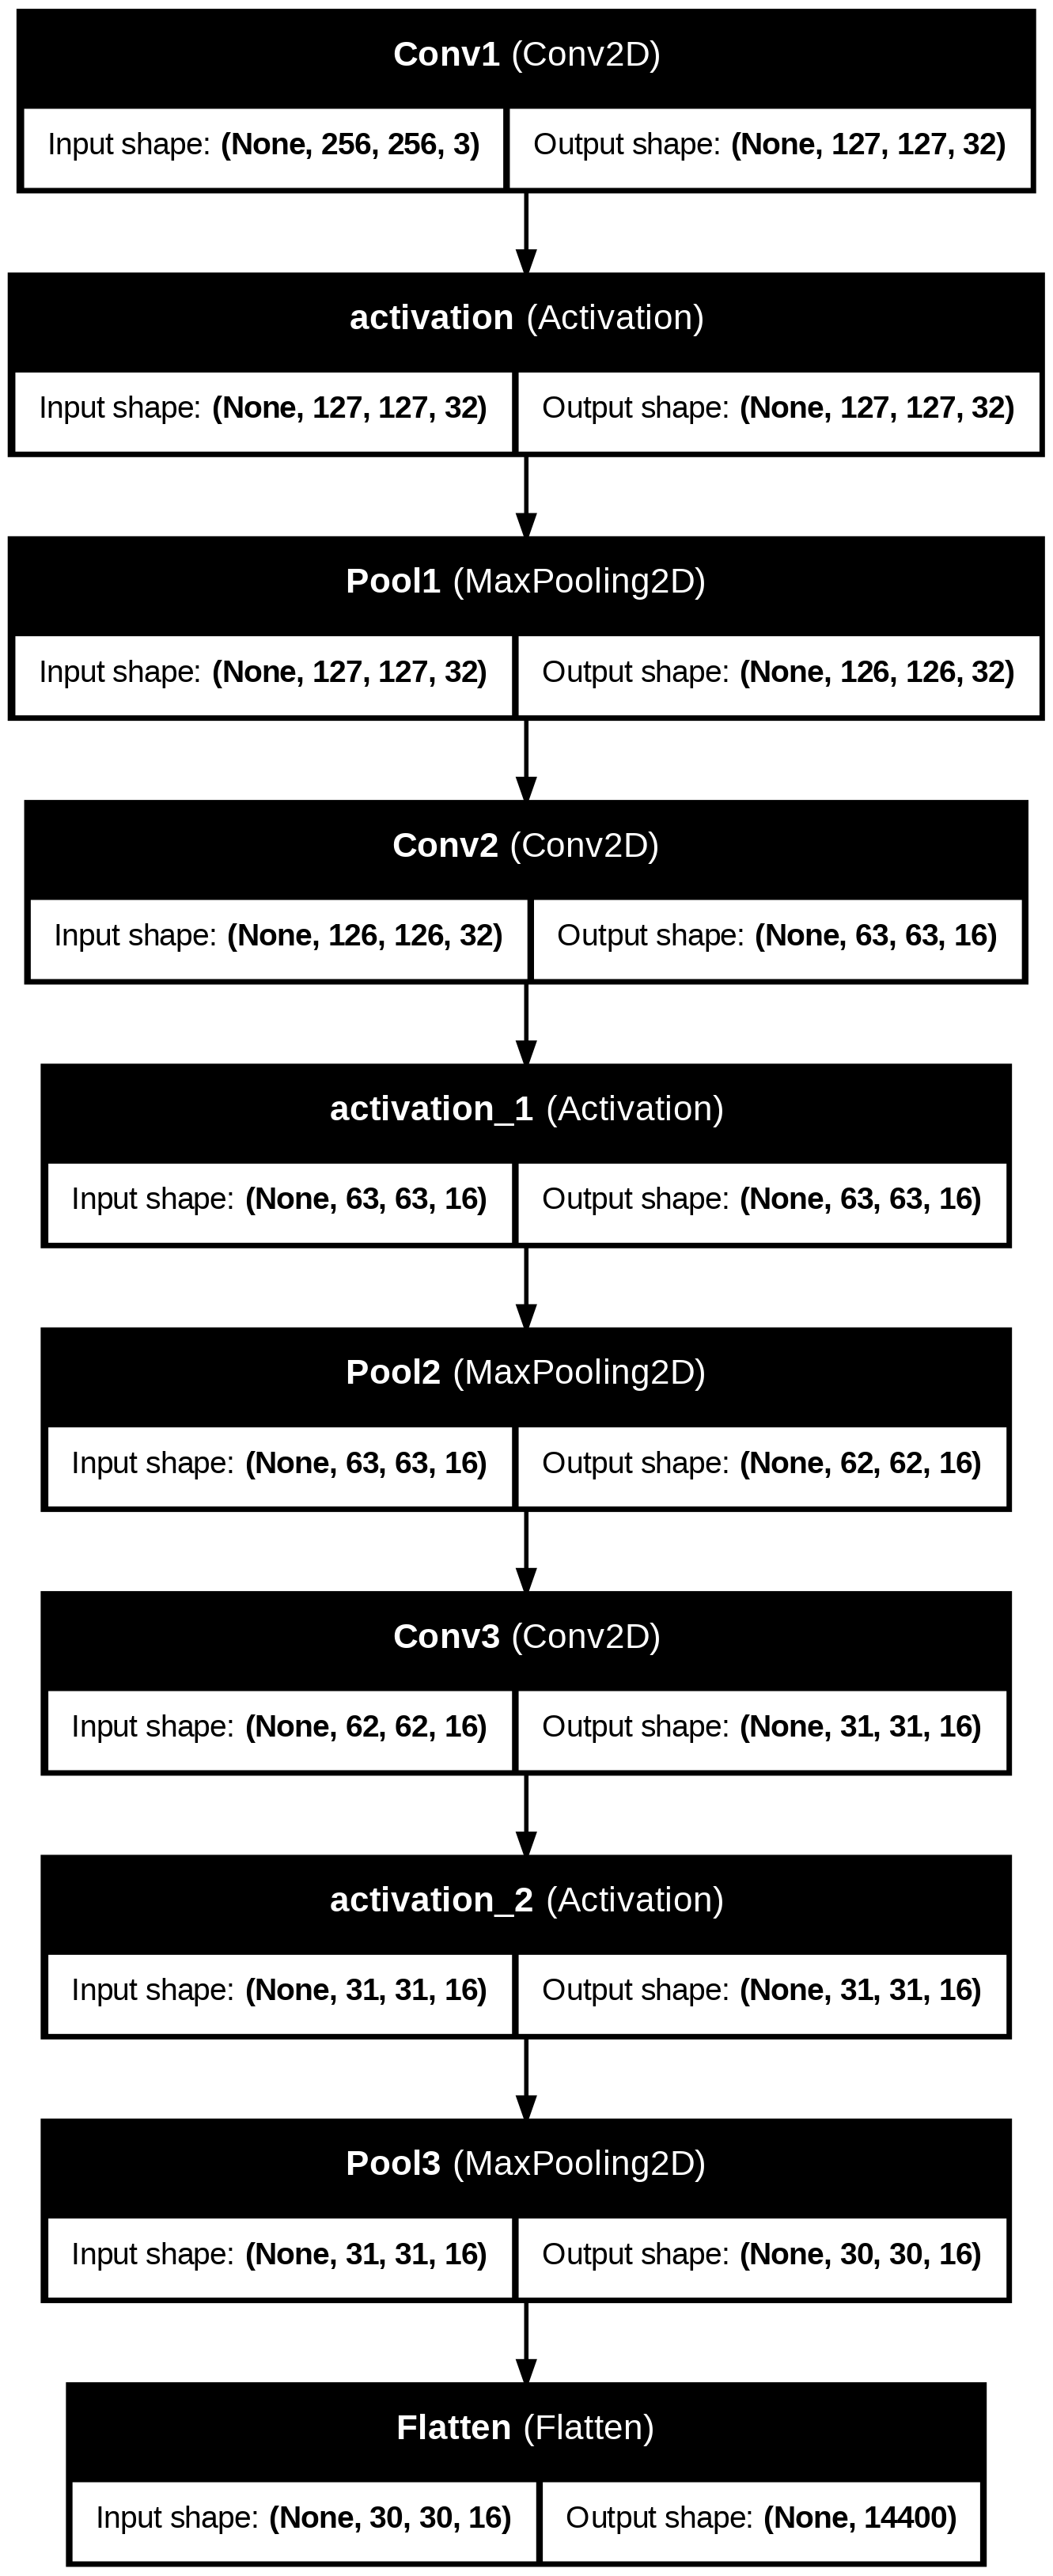

In [18]:
from keras.utils import plot_model
plot_model(cnn,show_layer_names=True,show_shapes=True)

**ANN**

* **Fully Connected Layer**

  Input to the ANN is from the Flatten Layer output

* Adding Hidden Layers for ANN

In [19]:
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=7200))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=3600))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=1800))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=900))

* **Output Layer**

In [20]:
cnn.add(Dense(kernel_initializer='random_uniform', activation='softmax', units=5))
# Units - 5 output classes

In [21]:
cnn.summary()

Model: "StatewiseDressesImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 63, 63, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 31, 31, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7200)                │     103,687,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3600)                │      25,923,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1800)                │       6,481,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 900)                 │       1,620,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           4,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137,722,005 (525.37 MB)

 Trainable params: 137,722,005 (525.37 MB)

 Non-trainable params: 0 (0.00 B)

* **Model Compile Parameters**

In [22]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

* **Final Model Visualization**

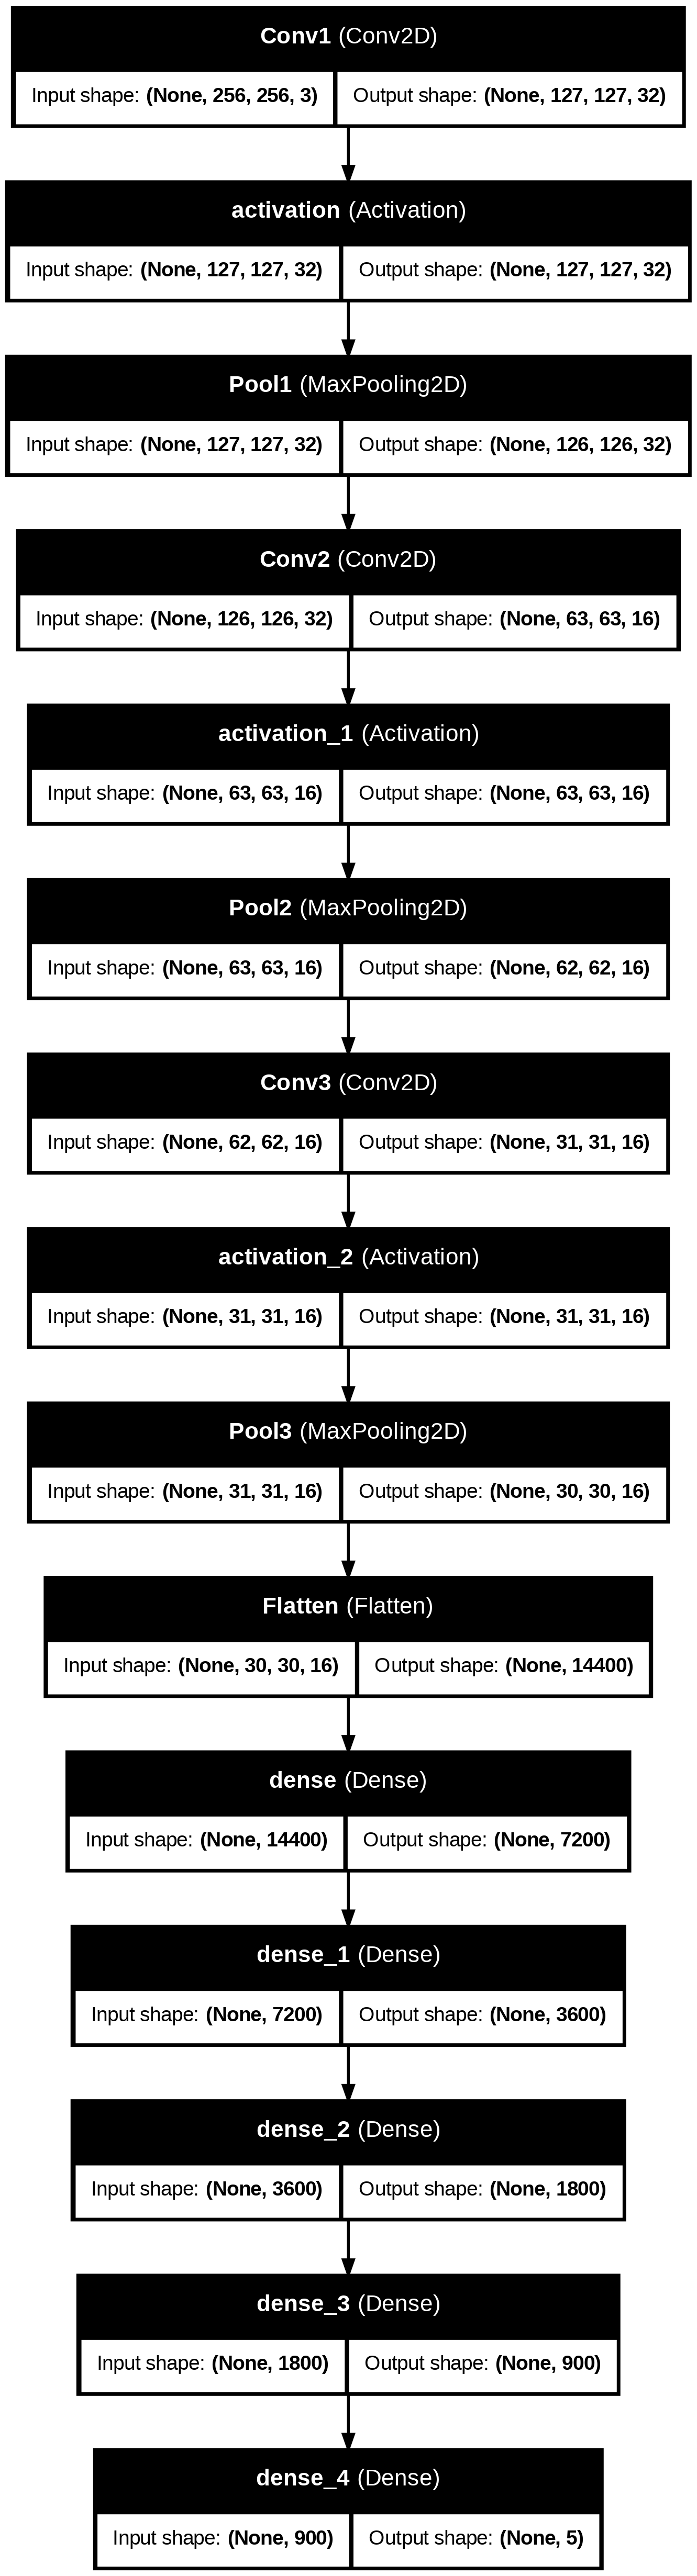

In [23]:

plot_model(cnn,show_layer_names=True,show_shapes=True)

**Training Model**

* **These CNN+ANN models will take huge time to run based on number of parameter training**

* While training images data , based on training params, we need to take small number of epochs first

* We can also control the cpu cores used by fit method, using hyper parameter **workers=-1** (means consider all cores available for faster execution)

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# ES = EarlyStopping(monitor='val_accuracy',
#                    patience=2, # Wait for 2 epochs before stopping the training
#                    verbose=1,
#                    restore_best_weights='True', # Restore model weights from the epoch with the best value of the monitored quantity.
#                    min_delta=0.1) # min difference from epoch to epoch

MC = ModelCheckpoint(
    '/kaggle/working/cnn.keras', # You also can provide full path to the folder you want to save your model to
    monitor='val_loss',  # Monitor other things like val_accuracy or accuracy 
    save_best_only='True', # Make sure to save only the best model
    verbose=1
)

In [25]:
cnn.fit(x_train, epochs=30, validation_data=x_test, callbacks=[MC])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746700954.414827     111 service.cc:148] XLA service 0x7d3940008430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746700954.416521     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746700954.416554     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746700954.957593     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/124 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.3203 - loss: 9.0045  

I0000 00:00:1746700959.451834     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/124 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2990 - loss: 3.5906

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.53154, saving model to /kaggle/working/cnn.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.2994 - loss: 3.5657 - val_accuracy: 0.2376 - val_loss: 1.5315
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.3499 - loss: 1.4421
Epoch 2: val_loss did not improve from 1.53154
124/124 ━━━━━━━━━━━━━━━━━━━━ 120s 924ms/step - accuracy: 0.3500 - loss: 1.4420 - val_accuracy: 0.2389 - val_loss: 1.5692
Epoch 3/30
112/124 ━━━━━━━━━━━━━━━━━━━━ 10s 858ms/step - accuracy: 0.3593 - loss: 1.4188
Epoch 3: val_loss improved from 1.53154 to 1.41772, saving model to /kaggle/working/cnn.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 127s 981ms/step - accuracy: 0.3611 - loss: 1.4171 - val_accuracy: 0.3899 - val_loss: 1.4177
Epoch 4/30
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.4184 - loss: 1.3441
Epoch 4: val_loss did not improve from 1.41772
124/124 ━━━━━━━━━━━━━━━━━━━━ 120s 910ms/step - accuracy: 0.4185 - loss: 1.3440 - val_accuracy: 0

* **Model Performance**

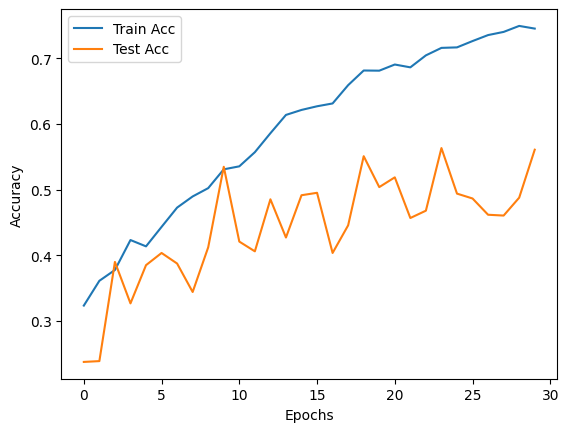

In [26]:
plt.plot(list(range(0,30)), cnn.history.history['accuracy'], label = "Train Acc")
plt.plot(list(range(0,30)), cnn.history.history['val_accuracy'], label = "Test Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

**Real time Prediction**
   * **Prediction on given Images**

In [29]:
model = tf.keras.models.load_model("/kaggle/working/cnn.keras")

In [30]:
# Writing a Function for prediction of given image

import cv2
import numpy as np

def classify(frame):
    # Converting Image Size to Cnn Input Size
    img=cv2.resize(frame,(256,256))
    
    #scaling to 0 to 1 range
    if(np.max(img)>1):
        img = img/255.0
        
    img = np.array([img])
    prediction = model.predict(img)[0] # will predict 10 classes probabilities
    # Taking Class Names & Numbers for Prediction from train data generator
    classes = {v: k for k, v in x_train.class_indices.items()}
    # mapping high probability class index number with class name
    cls = classes[np.argmax(prediction)] 
    
    return cls # output class name

* **Taking Sample Images from Test Images given**

In [40]:
import glob

images = glob.glob("/kaggle/input/testdata/Different Styles/*")

In [32]:
images

['/kaggle/input/testdata/Different Styles/Sikkimese woman in traditional dress_Image_34.jpg',
 '/kaggle/input/testdata/Different Styles/Maharastra men with Pheta_Image_20.jpg',
 '/kaggle/input/testdata/Different Styles/Dogri suthan Jammu Kashmir_Image_5.jpg',
 '/kaggle/input/testdata/Different Styles/Andhra Pradesh Lungi for men_Image_66.jpg',
 '/kaggle/input/testdata/Different Styles/specialty_kerala_kathakali_costume_Image_27.jpg',
 '/kaggle/input/testdata/Different Styles/Maharastra women with veni_Image_8.jpg',
 '/kaggle/input/testdata/Different Styles/Taranga headdress Jammu Kashmir_Image_30.webp',
 '/kaggle/input/testdata/Different Styles/Pochampally Ikat Sarees from Andhra Pradesh_Image_62.jpg',
 '/kaggle/input/testdata/Different Styles/women_kerala_modern_saree_Image_11.jpg',
 '/kaggle/input/testdata/Different Styles/Sikkim cultural dress_Image_56.png']

* **Applying above detect function on Images**

Given Image:


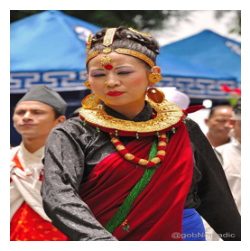

Original Name: Sikkimese woman in traditional dress_Image_34
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction Name: SikkimDressingStyle
Given Image:


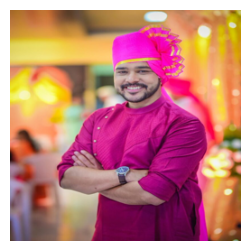

Original Name: Maharastra men with Pheta_Image_20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Name: MaharashtraDressingStyle
Given Image:


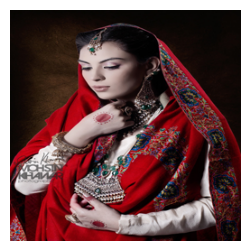

Original Name: Dogri suthan Jammu Kashmir_Image_5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Name: JammuKashmirDressingStyle
Given Image:


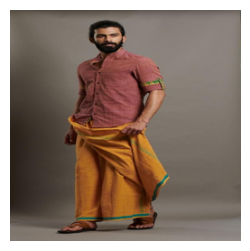

Original Name: Andhra Pradesh Lungi for men_Image_66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Name: MaharashtraDressingStyle
Given Image:


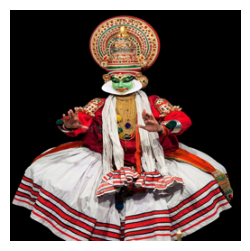

Original Name: specialty_kerala_kathakali_costume_Image_27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Name: KeralaDressingStyle
Given Image:


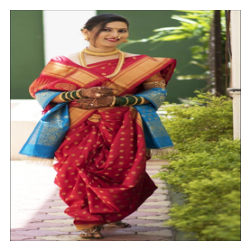

Original Name: Maharastra women with veni_Image_8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Name: MaharashtraDressingStyle
Given Image:


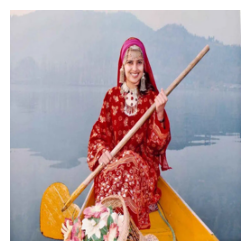

Original Name: Taranga headdress Jammu Kashmir_Image_30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction Name: JammuKashmirDressingStyle
Given Image:


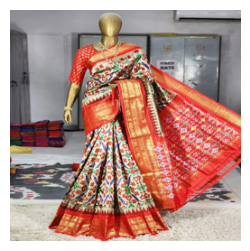

Original Name: Pochampally Ikat Sarees from Andhra Pradesh_Image_62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Name: AndhraPradeshDressingStyle
Given Image:


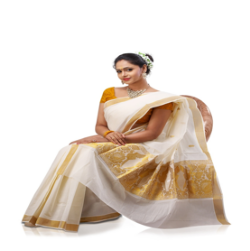

Original Name: women_kerala_modern_saree_Image_11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Name: KeralaDressingStyle
Given Image:


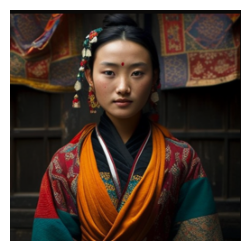

Original Name: Sikkim cultural dress_Image_56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Name: SikkimDressingStyle
All Images Processed Successfully!


In [33]:
from PIL import Image

# classify() function
def classify(image):
    try:
        # Normalize the image
        img = image / 255.0
        
        # Add Batch Dimension
        img = np.expand_dims(img, axis=0)

        # Predict using trained model
        prediction = cnn.predict(img)[0]  # Assuming cnn is your trained model
        
        # Get Class Labels from Train Generator
        class_indices = x_train.class_indices  # Assuming x_train is your training generator
        classes = {v: k for k, v in class_indices.items()}
        
        # Get predicted class
        predicted_class = np.argmax(prediction)
        label = classes[predicted_class]

        return label

    except Exception as e:
        return f"Prediction Error: {e}"


# Main Code
for img in images:
    try:
        # Open and preprocess image
        image = Image.open(img).convert('RGB')
        image = image.resize((256,256))  # Resize as per model input
        image = np.array(image)

        print("Given Image:")
        plt.figure(figsize=(3, 3))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Extract Original File Name
        original_name = os.path.splitext(os.path.basename(img))[0]
        print("Original Name:", original_name)

        # Predict
        output = classify(image)
        print("Prediction Name:", output)

        print("=" * 70)

    except Exception as e:
        print(f"Error processing image: {img}")
        print(f"Error: {e}")
        print("=" * 70)

print("All Images Processed Successfully!")


**Notes:**
* We can increase model performance by
    - changing epochs,
    - batch size &
    - hyp param tuning (conv+pool layers adding, filters, kernel sizes, strides, ANN Hidden Layers, etc..)

### Considering VGG16 (Recent)

- Using pretrained model of VGG , we can do 
    - **predict** given image directly or 
    - **build & train** a custom image classification model , with vgg cnn layer

**1. For Direct Image Class Prediction**



In [34]:

# List all files in /kaggle/working
print(os.listdir('/kaggle/working'))

['cnn.keras', '.virtual_documents', 'model.png']


In [35]:
# Loading Vgg model & supportive functions for prediction, through keras module
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

In [36]:
# Downloading model with output layer

model = VGG16(weights='imagenet') # imagenet trained weights are considered
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# load an image from file
image = load_img("/kaggle/input/testdata/Different Styles/Andhra Pradesh Lungi for men_Image_66.jpg", target_size=(224, 224)) # Vgg requires input image in 224*224
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [38]:
image.shape

(1, 224, 224, 3)

Building Custome Image Classification Model

* **Taking Images Data Used for Image Classification Task**

In [43]:

# Path for train, validation and test datasets
train_path = '/kaggle/input/cnndata/CNN Data/train'
test_path = '/kaggle/input/cnndata/CNN Data/test'

IMAGE_SIZE = [224, 224] #Default image size for VGG16


folders = glob.glob('/kaggle/input/cnndata/CNN Data/train/*') #Get number of classes

# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Through flow_from_directory - We create an array of images that can be used for training. 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')
# validation_set = validation_datagen.flow_from_directory('Datasets/val',
#                                                  target_size = (224, 224),
#                                                  batch_size = 64,
#                                                  class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3949 images belonging to 5 classes.
Found 808 images belonging to 5 classes.


* **VGG Model**

In [44]:
# Loading model from keras api

from tensorflow.keras import layers, models


In [45]:
# The input is a 224 * 224 RGB image to VGG
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model 
base_vgg = VGG16(include_top = False, input_shape = IMAGE_SIZE, weights = 'imagenet')

# Visualize the model
base_vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

* **include_top=False** means that we are not loading the last layer (classification) of the model. 
    - Since models are visualized from bottom to top, that layer is referred to as the top layer. 
        - Excluding the top layers is important for feature extraction. 

* Freezing the layers from the pre-trained model is vital. 
    - This is because we don’t want the weights in those layers to be re-initialized. 
        - If they are, then you will lose all the learning that has already taken place. This will be no different from training the model from scratch.

In [46]:
base_vgg.trainable = False

* Flatten

In [47]:
model = models.Sequential()
model.add(base_vgg)
model.add(layers.Flatten())
model.add(layers.Dense(12544, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6272, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3136, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))  
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12544)               │     314,716,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6272)                │      78,682,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3136)                │      19,672,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │          15,685 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,801,157 (1.59 GB)

 Trainable params: 413,086,469 (1.54 GB)

 Non-trainable params: 14,714,688 (56.13 MB)

* Compile the model


In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Training

In [49]:
history = model.fit(training_set, validation_data=test_set, epochs=25, batch_size=30)

Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.2855 - loss: 22.8791 - val_accuracy: 0.2995 - val_loss: 1.4830
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4011 - loss: 1.3951 - val_accuracy: 0.3651 - val_loss: 1.3765
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4694 - loss: 1.2539 - val_accuracy: 0.4158 - val_loss: 1.2484
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4685 - loss: 1.1990 - val_accuracy: 0.4604 - val_loss: 1.1685
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5145 - loss: 1.1258 - val_accuracy: 0.4901 - val_loss: 1.2245
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5167 - loss: 1.1348 - val_accuracy: 0.4629 - val_loss: 1.1613
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5588 - loss: 1.0343 - val_accuracy: 0.4975 - val_loss: 1.1601
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5540 - loss: 1.0155 - val_accuracy: 0.4814 - 

* Viusalization of Model Performance

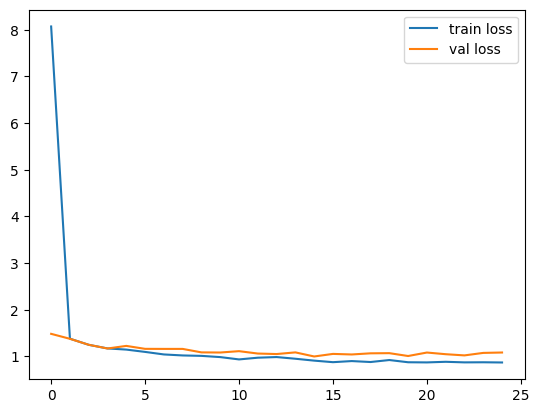

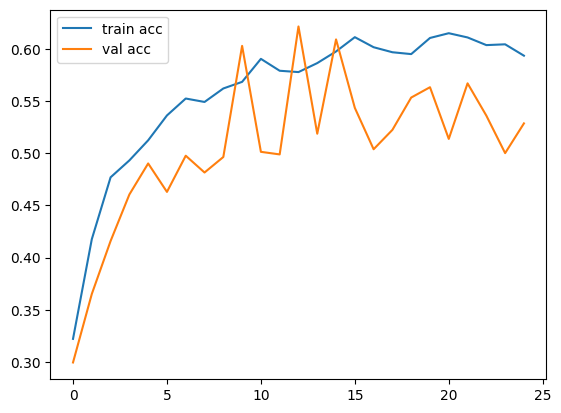

In [50]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [51]:
# load an image from file
image = load_img("/kaggle/input/testdata/Different Styles/specialty_kerala_kathakali_costume_Image_27.jpg", target_size=(224, 224)) # Vgg requires input image in 224*224
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [52]:
image.shape

(1, 224, 224, 3)

In [53]:
#from keras.applications.vgg16 import decode_predictions
# prediction
yhat = model.predict(image)
# convert the probabilities to class labels
#label = decode_predictions(yhat, top=3)[0]
#label
#yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [54]:
classes = np.argmax(yhat,axis=1)

In [55]:
classes

array([3])

In [56]:
yhat

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [57]:
training_set.class_indices

{'AndhraPradeshDressingStyle': 0,
 'JammuKashmirDressingStyle': 1,
 'KeralaDressingStyle': 2,
 'MaharashtraDressingStyle': 3,
 'SikkimDressingStyle': 4}

In [58]:
for cls in training_set.class_indices:
    print(cls+": "+str(yhat[0][training_set.class_indices[cls]]))

AndhraPradeshDressingStyle: 0.0
JammuKashmirDressingStyle: 0.0
KeralaDressingStyle: 0.0
MaharashtraDressingStyle: 1.0
SikkimDressingStyle: 0.0
